See pandas [docs](http://pandas.pydata.org/pandas-docs/stable/basics.html#function-application).

/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


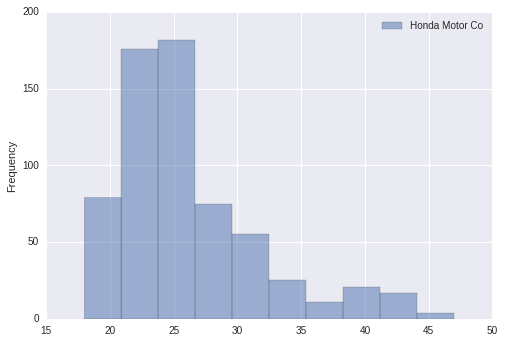

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris') 

df = pd.read_csv('/home/pybokeh/temp/vehicles.csv',
                 usecols=['year', 'make', 'model', 'comb08', 'fuelType', 'fuelType1', 
                          'fuelType2', 'atvType', 'cylinders', 'VClass'])

df.rename(columns={'comb08':'combmpg'}, inplace=True)

(
 df
   .query("make in('Honda','Acura') \
           & fuelType1 in('Regular Gasoline','Premium Gasoline','Midgrade Gasoline') \
           & cylinders in(4, 6) \
           &  VClass in('Compact Cars','Subcompact Cars','Midsize Cars','Large Cars','Sport Utility','Minivan') \
           & ~(fuelType2 in('E85','Electricity','Natural Gas','Propane')) \
          "
         )
   ['combmpg'].plot.hist(alpha=0.5, label='Honda Motor Co')
   #.pipe(lambda df: plt.hist(df.combmpg.values))
)
plt.legend(loc='best')
plt.show()

/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


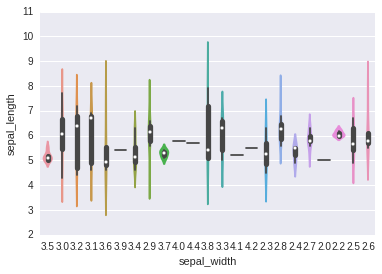

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

(
 iris
     .pipe((sns.violinplot, 'iris'), x=iris.sepal_width, y=iris.sepal_length)
)
plt.show()

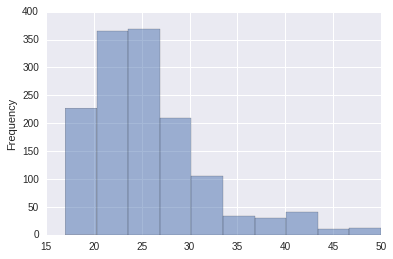

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = (pd.read_csv('/home/pybokeh/temp/vehicles.csv',
                 usecols=['year', 'make', 'model', 'comb08', 'fuelType', 'fuelType1', 
                          'fuelType2', 'atvType', 'cylinders', 'VClass'])
      .rename(columns={'comb08':'combmpg'})
      .query("make in('Honda','Acura','Toyota','Lexus') \
              & fuelType1 in('Regular Gasoline','Premium Gasoline','Midgrade Gasoline') \
              & cylinders in(4, 6) \
              & VClass in('Compact Cars','Subcompact Cars','Midsize Cars','Large Cars','Sport Utility','Minivan') \
              & ~(fuelType2 in('E85','Electricity','Natural Gas','Propane'))")
      ['combmpg'].plot.hist(alpha=0.5, label='Honda Motor Co')
     )